<a href="https://colab.research.google.com/github/armanheydari/Advance-Deep-Learning_Winter-2024/blob/main/Assignment1/cmpt489_828_a1_q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CMPT 489/828 Assignment 1**

Follow the instructions in this notebook and complete the missing code.

**NOTE: Do Not Change Any Provided Code or Given Variable Names!**

**Q3**. k-Nearest Neighbors (kNN) (**25 points**)

Comment/document your code to show your thought process (**1 points**)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

(a). Load dataset (**2 points**)

(150, 4) (150,)


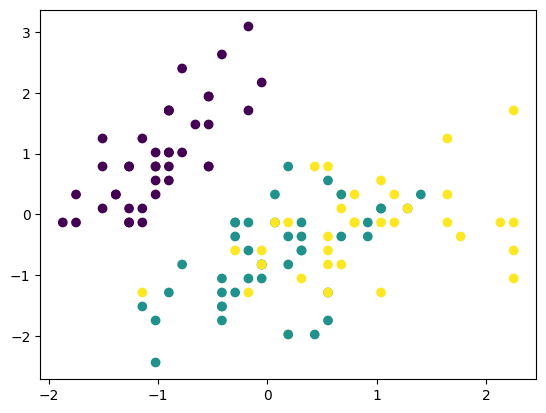

In [2]:
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
# load iris dataset, this dataset contains 150 datapoints with 4 features
iris = datasets.load_iris()
# extract iris data into a numpy array
iris_data = iris.data
scaler = StandardScaler()
scaler.fit(iris_data)
iris_data = scaler.transform(iris_data)
# extract iris label into a numpy array, labels are integers: 0, 1, 2
iris_label = iris.target

iris_data, iris_label = shuffle(iris_data, iris_label)

print(iris_data.shape, iris_label.shape)

###############################################################################
# TODO:                                                                       #
# 1. Split the iris dataset into train (x_train, y_train) and                 #
# test (x_test, y_test) sets using a 80%/20% split                            #
# 2. Plot the first and second element of each datapoint in the               #
# train set (x_train) in a single scatter plot                                #
# Use the scatter() function from matplotlib.pyplot module                    #
# Use different colours to represent the corresponding classes from y_train   #
# for each datapoint                                                          #
###############################################################################
# *****BEGIN YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
# We can use a built-in sklearn method for splitting train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2)
# Plot the scatter, c represents the color and should be between 0 and 1
# We took the label, divided by the maximum label, of each sample as the color
plt.scatter(x_train[:,0], x_train[:,1], c=y_train/np.max(y_train))
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

(b). Implement kNN Classifier (**6 points**)

In [3]:
from logging import exception
class KNearestNeighbor:
    def __init__(self, x, y):
        """
        Initialise the kNN classifier, memorize the input data and label.

        Inputs:
        - x: A numpy array containing the dataset of shape (num_data, D),
        with num_data being the number of datapoints of dimension D
        - y: A numpy array containing the labels of shape (num_data,),
        y[i] is the label of x[i]
        """
        ########################################################################
        # TODO:                                                                #
        # Save the data x and label y                                          #
        ########################################################################
        # *****BEGIN YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        self.data = x
        self.labels = y

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    @staticmethod
    def l1_distance(a, b):
        """
        Calculate the l1 distance between two numpy arrays a and b.
        Inputs:
        - a: A numpy array
        - b: A numpy array

        Returns:
        -  : The L1 distance between a and b
        """
        ########################################################################
        # TODO:                                                                #
        # Calculate and return the l1 distance                                 #
        ########################################################################
        # *****BEGIN YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        dist_l1 = np.sum(np.abs(a-b), axis=1)

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return dist_l1

    @staticmethod
    def l2_distance(a, b):
        """
        Calculate the l2 distance between two numpy arrays a and b.
        Inputs:
        - a: A numpy array
        - b: A numpy array

        Returns:
        -  : The L2 distance between a and b
        """
        ########################################################################
        # TODO:                                                                #
        # Calculate and return the l2 distance                                 #
        ########################################################################
        # *****BEGIN YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        # In case we have an image, we should flat it and then compute
        if b.ndim>2:
          flattened_size = np.prod(b.shape[1:])
          b = b.reshape((b.shape[0], flattened_size))
        if a.ndim>2:
          flattened_size = np.prod(a.shape)
          a = a.reshape((flattened_size))
        # L2 distance formula
        dist_l2 = np.sum(np.square(a-b), axis=-1)

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return dist_l2

    @staticmethod
    def new_data_rep_l2(a, b):
        """
        Calculate a new representation of image a and b, then return the l2 distance
        Inputs:
        - a: A numpy array of an image
        - b: A numpy array of an image

        Returns:
        -  : The l2 distance between your representation of a and b
        """
        ########################################################################
        # TODO:                                                                #
        # The function below is for you to implement your data representation  #
        # of an image                                                          #
        # Come back to fill in this code when you are at step (e).iii.         #
        ########################################################################
        # *****BEGIN YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        def new_data_rep(i):
            """
            Create a represenation of image i
            Inputs:
            - i: A numpy array of an image

            Returns:
            -  : A numpy array containing the representaion of i
            """
            def histogram_ranges(color_channel):
              # Define the ranges
              ranges = [(i, i+20) for i in range(0, 255, 20)]
              # Initialize a vector to hold the counts
              counts = np.zeros(len(ranges))
              # Total number of pixels
              total_counts = color_channel.shape[0] * color_channel.shape[1]
              # Calculate the counts for each range
              for j, (low, high) in enumerate(ranges):
                  counts[j] = ((color_channel >= low) & (color_channel < high)).sum()/total_counts
              return counts

            # Split the image into R, G, B channels
            if i.ndim==3:
              return np.concatenate((histogram_ranges(i[:, :, 0]),
                                    histogram_ranges(i[:, :, 1]),
                                    histogram_ranges(i[:, :, 2])))
            else:
              all_image_representations = []
              for j, img in enumerate(i):
                all_image_representations.append(np.concatenate((
                    histogram_ranges(img[:, :, 0]),
                    histogram_ranges(img[:, :, 1]),
                    histogram_ranges(img[:, :, 2]))))
              return np.array(all_image_representations)

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return KNearestNeighbor.l2_distance(new_data_rep(a), new_data_rep(b))

    def predict(self, x, k, dist_type='l1'):
        """
        Given a test point x, predict its class.

        Inputs:
        - x: A numpy array containing the test datapoint.
        - k: k value for kNN, number of nearest neighbors.
        - dist_type: use to choose distance functions: l1, l2 and rep_l2.

        Returns:
        - : The class of datapoint x in integer
        """
        ########################################################################
        # TODO:                                                                #
        # Use majority vote to decide the class for x                          #
        # Accommodate different distance metrics, controlled by (dist_type)    #
        ########################################################################
        # *****BEGIN YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        # Calculate the distance from the new data point whith all of our data
        if dist_type == 'l1':
          distance = self.l1_distance(x, self.data)
        elif dist_type == 'l2':
          distance = self.l2_distance(x, self.data)
        elif dist_type == 'rep_l2':
          distance = self.new_data_rep_l2(x, self.data)
        else:
          raise ValueError('dist_type is not valid!')
        # Sort the distances array from closest sample to the furthest
        sorted_indices = np.argsort(distance)
        # Save the k nearest neighbours' labels
        nearest_neighbour_labels = self.labels[sorted_indices]
        nearest_neighbour_labels = nearest_neighbour_labels[:k]
        # Find unique values in array along with their counts
        vals, counts = np.unique(nearest_neighbour_labels, return_counts=True)
        # Find mode=majority value
        majority_value = vals[np.argmax(counts)]
        return majority_value
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****




(c). Hyperparameters tunning (**6 points**)

A function to evaluate a set of data is given below.

This is used to tune the values of k on the **val** set and evaluate the performance on the **test** set.

In [4]:
# Example of initializing the kNN classifier
knn = KNearestNeighbor(x_train, y_train)

def evaluate(knn_classifier, x_eval, y_eval, k, dist_type='l1', return_preds=False):
    """
    Use kNN to predict values of x_eval.
    Then use the predicted values and y_eval to report classifier performance.
    Returns the point-wise accuracy.
    The point-wise accuracy is the number of true positives over the total number of data points.

    Inputs:
        - knn_classifier: Your kNN classifier
        - x_eval: A numpy array of shape (num_eval, D) containing the evaluation dataset
          consisting of num_eval samples each of dimension D.
        - y_eval: A numpy array of shape (num_eval,) containing the evaluation dataset labels, where
              y_eval[i] is the label for x_eval[i]
        - k: k value for kNN, number of nearest neighbors.
        - dist_type: use to choose distance functions: l1, l2 and rep_l2.
        - return_preds: set to true to return a list containing the predictions.

    Returns:
        - : The point-wise accuracy in the range of [0, 1]
        - : optional: a list containing the predictions
    """
    preds = np.array([knn_classifier.predict(x, k, dist_type=dist_type) for x in x_eval])
    tp = np.sum(preds==y_eval)
    if return_preds:
      return tp/len(y_eval), preds
    return tp/len(y_eval)


Use 5-fold validation to find the best value for k and the best distance metric (among L1 or L2).

**HINT**: Plot the performance average over 5 **val** sets for each value of k.

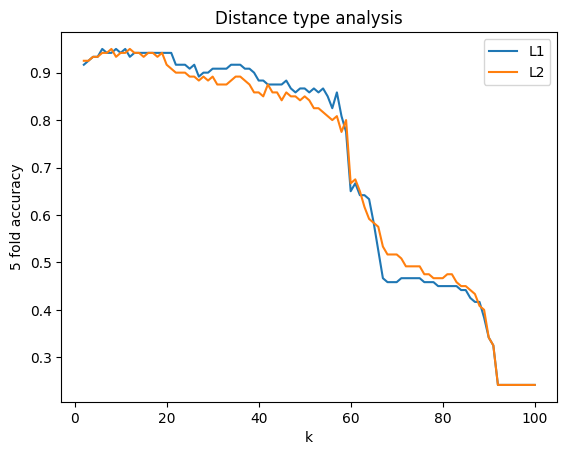

best l1 result was k= 8 with validation accuracy of 95.0 %
best l2 result was k= 8 with validation accuracy of 95.0 %


In [5]:
###############################################################################
# TODO:                                                                       #
# 1. Perform 5-fold validation using the provided evaluate() function         #
# 2. Compare and find the best distance metric (among L1 or L2)               #
# 3. Find the optimal k for the best distance metric you found                #
# NOTE: Do Not Choose k==1                                                    #
###############################################################################
# *****BEGIN YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
results = {}
def evaluate_folds(dist_type, folds=5):
  # We want to consider all possible integers from 2 to 100 for k
  for k in range(2,101):
    results[k] = []
    # We need a loop for applying 5 fold
    for i in range(5):
      # We split 20% of the train data in each fold for the validation, means 24 samples
      X_train = np.concatenate((x_train[:i*24], x_train[(i+1)*24:]))
      X_validation = x_train[i*24:(i+1)*24]
      Y_train = np.concatenate((y_train[:i*24], y_train[(i+1)*24:]))
      Y_validation = y_train[i*24:(i+1)*24]
      # Train the classifier and evaluate it with this data and distance type
      knn = KNearestNeighbor(X_train, Y_train)
      results[k].append(evaluate(knn, X_validation, Y_validation, k=k, dist_type=dist_type))
    results[k] = np.average(results[k])
  return results
# Run the function for each distance method and plot the results
l1_results = evaluate_folds('l1')
plt.plot(l1_results.keys(), l1_results.values(), label = 'L1')
l2_results = evaluate_folds('l2')
plt.plot(l2_results.keys(), l2_results.values(), label = 'L2')
plt.xlabel('k')
plt.ylabel('5 fold accuracy')
plt.title('Distance type analysis')
plt.legend()
plt.show()
# Find the best k for each distance function
l1_key_max = max(l1_results.keys(), key=(lambda temp: l1_results[temp]))
print('best l1 result was k=', l1_key_max, 'with validation accuracy of',
      round(100*l1_results[l1_key_max], 2),'%')
key_max = max(l2_results.keys(), key=(lambda temp: l2_results[temp]))
print('best l2 result was k=', key_max, 'with validation accuracy of',
      round(100*l2_results[key_max], 2), '%')
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

The maximum accuracy is the same among L1 and L2, but with the shape of the chart, we can feel like **L1** is better for a reasonable value of k.

Report the performance of your classifier on the **test** set using the best k and best distance metric

In [6]:
###############################################################################
# TODO:                                                                       #
# 1. Use the provided evaluate() function with your best k and distance metric#
# 2. Report the accuracy on the test set                                      #
###############################################################################
# *****BEGIN YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
knn = KNearestNeighbor(x_train, y_train)
print('test accuracy:', round(100*evaluate(knn, x_test, y_test, k=l1_key_max, dist_type='l1'), 2), '%')
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

test accuracy: 100.0 %


(d). Image dataset (**5 points**)
Repeat the above steps for the Image dataset.

**NOTE: You are given the train/val/test set split. There is no need to do 5-fold validation here.**

Files already downloaded and verified
Files already downloaded and verified
(4000, 32, 32, 3) (4000,)
(1000, 32, 32, 3) (1000,)
(500, 32, 32, 3) (500,)


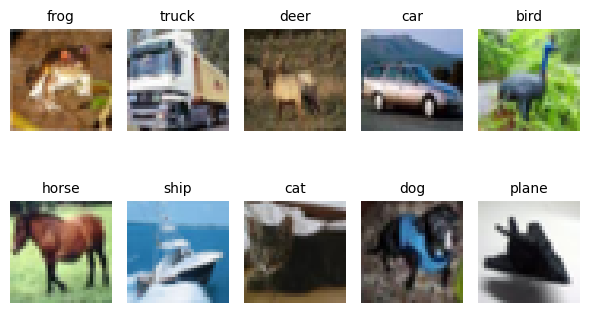

In [7]:
import torchvision


# load CIFAR-10 dataset with pytorch

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True)

x_train = trainset.data[:4000]
y_train = np.array(trainset.targets)[:4000]

x_val = trainset.data[4000:5000]
y_val = np.array(trainset.targets)[4000:5000]

x_test = testset.data[:500]
y_test = np.array(testset.targets)[:500]

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)


class_map = {0: 'plane', 1: 'car', 2: 'bird', 3: 'cat', 4: 'deer',
             5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9:'truck'}
###############################################################################
# TODO:                                                                       #
# Visualise 1 sample of each class from train set (x_train)                   #
###############################################################################
# *****BEGIN YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
# Create a 2x5 grid of subplots to render multiple images
fig, axes = plt.subplots(2, 5, figsize=(6, 4))
# Create a list of possible class values, to remove any class number that we show
temp = [i for i in range(10)]
# A value to iterate through the training data
k = 0
# Iterate over the rows (i) and columns (j) of the subplot grid
for i in range(2):
    for j in range(5):
        # Find the next index where the corresponding label is still not showed
        while y_train[k] not in temp:
            k += 1
        # Remove the label from 'temp' to avoid repetition
        temp.remove(y_train[k])
        # Display the image in the current subplot
        axes[i, j].imshow(x_train[k])
        # Turn off axis ticks for better visualization
        axes[i, j].axis('off')
        # Set the title of the subplot with the corresponding class name
        axes[i, j].set_title(class_map[y_train[k]], fontsize=10)
# For better spacing
plt.tight_layout()
plt.show()
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


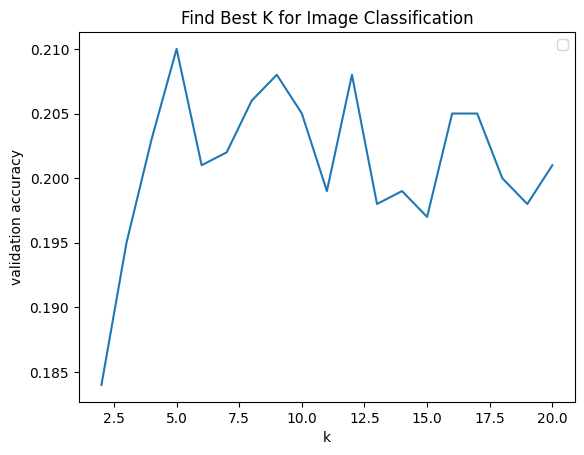

best l2 result was k= 5 whith validation accuracy of 21.0 %


In [8]:
###############################################################################
# TODO:                                                                       #
# 1. Initilise kNN classifier                                                 #
# 2. Find the best k for l2 distance and                                      #
# plot the performance average over the val set for each value of k           #
###############################################################################
# *****BEGIN YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
# We want to consider all possible integers from 2 to 15 for k
results = {}
for k in range(2,21):
  # Train the classifier and evaluate it with this data and distance type
  knn = KNearestNeighbor(x_train, y_train)
  print(k)
  results[k] = evaluate(knn, x_val, y_val, k=k, dist_type='l2')
# Plot the chart of accuracies with each value of k
plt.plot(results.keys(), results.values())
plt.xlabel('k')
plt.ylabel('validation accuracy')
plt.title('Find Best K for Image Classification')
plt.legend()
plt.show()
# Print the best k and its accuracy
key_max = max(results.keys(), key=(lambda temp: results[temp]))
print('best l2 result was k=', key_max, 'whith validation accuracy of',
      round(100*results[key_max], 2), '%')
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


test for k= 5 : 21.6 %


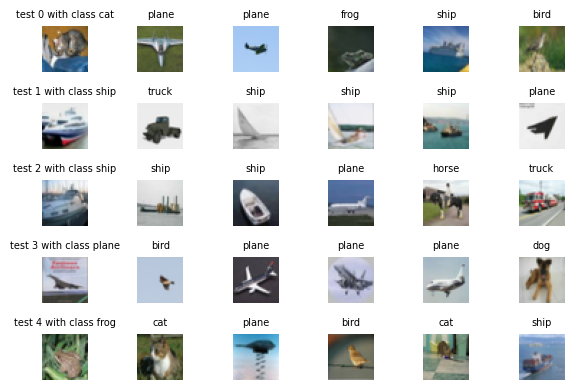

In [9]:
##################################################################################
# TODO:                                                                          #
# 1. Report test set performance with your best k                                #
# 2. Visualize the k-nearest neighbors for the first 5 datapoints in the test set#
# NOTE: Do Not Choose k==1                                                       #
##################################################################################
# *****BEGIN YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
knn = KNearestNeighbor(x_train, y_train)
print("test for k=", key_max,':',
      round(100*evaluate(knn, x_test, y_test, k=key_max, dist_type='l2'),2),'%')
fig, axes = plt.subplots(5, key_max+1, figsize=(6, 4))
for i in range(5):
  # Display the current test image in the subplot
  axes[i, 0].imshow(x_test[i])
  # Turn off axis ticks for better visualization
  axes[i, 0].axis('off')
  # Set the title of the subplot with the corresponding class name
  axes[i, 0].set_title('test '+str(i)+' with class '+class_map[y_test[i]], fontsize=7)
  # Calculate all l2 distances from this sample
  distance = knn.l2_distance(x_test[i], knn.data)
  # Sort the distances array from closest sample to the furthest
  sorted_indices = np.argsort(distance)
  # Save the k nearest neighbours' labels and images
  nearest_neighbour_labels = knn.labels[sorted_indices]
  nearest_neighbour_images = knn.data[sorted_indices]
  nearest_neighbour_labels = nearest_neighbour_labels[:key_max]
  nearest_neighbour_images = nearest_neighbour_images[:key_max]
  for j in range(key_max):
    # Display the image in the current subplot
    axes[i, j+1].imshow(nearest_neighbour_images[j])
    # Turn off axis ticks for better visualization
    axes[i, j+1].axis('off')
    # Set the title of the subplot with the corresponding class name
    axes[i, j+1].set_title(class_map[nearest_neighbour_labels[j]], fontsize=7)
# For better spacing
plt.tight_layout()
plt.show()
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

(e). Discussion

**i**. The L1 and L2 distances when applied on the CIFAR-10 dataset, are measuring the distances between raw pixels.

Why is pixel-distance a bad representation of image distance? (**1 point**)

**// your answers here**

Because it's obviously not related to the shape in the image and its just related to the colors. for example, a brown ship and brown cat would be much closer than a white ship and a brown ship. As we are measuring the RGB distancesw of pixels.

**ii**. Look at the misclassified examples from CIFAR-10 you visualized.

Take one example and explain why do you think this sample is misclassified? (**1 points**)

**// your answers here**

the first 4th sample which is a frog is misclassifed, as you can see the k nearest neighbours are not frog at all. the first one is a cat, and its the closest neighbour because most of the background is greenjust like the frog's image and the cat is brown and almost in the place of the frog, so when we calculate the distance which is the difference of rgb of each of the pixels it would be close. We also have a brown opbject almost as the same size of our frog in the third, fourth and fifth nearest neighbours. and the second nearest one has the brown color on approximately half of the image, the down half which is where our frog is placed.

**iii**. Instead of using raw pixels of images as an input to kNN, could you suggest another data representation of the images to be fed as an input to kNN? Does it impact the kNN performance? (**3 points**)

**HINT**: An example of data representation for an image is its color histogram.

Implement your method and report the performance using the best k you found for l2 distance in step (c) on the **test** set.

In [11]:
###############################################################################
# TODO:                                                                       #
# 1. Go back to KNearestNeighbor (class defined above) and                    #
# implement the function new_data_rep() in section (b) above                  #
# 2. Test your representation with the best k you found for l2 distance       #
# using the evaluate() function provided above                                #
# 3. Does the new representation yield better or worse performance?           #
###############################################################################
# *****BEGIN YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
# Print the best k and its accuracy
new_rep_result = evaluate(knn, x_test, y_test, k=key_max, dist_type='rep_l2')
print('New data representation distance test accuracy for k=', key_max,
      'is', round(100*new_rep_result, 2), '%')
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

New data representation distance test accuracy for k= 5 is 26.0 %


My approach is to count an image's number of red, green, blue values at each range from [0-20] and [20-40] and ... [240-255], so we will have a vector of length 3*13=39 for each image that somehow shows the diversity of colors without respect to position. I also divided the numbers to number of pixels, this is a sort of normalization to prevent very large values and makes the values of each representation between 0 and 1.

As you can see, the test accuracy is improved, but it's still not ideal because it's not dependent on any shapes which is the main difference of classses.